In [1]:
%matplotlib inline
import pandas as pd
from fbprophet import Prophet
from statsmodels.tsa.stattools import adfuller


df = pd.read_csv('.\data\processed\day_series.csv')
df.columns = ['ds', 'y']
df.head()

,ds,y
0,2018-11-07,30.0
1,2018-11-08,1.0
2,2018-11-09,9.0
3,2018-11-10,12.0
4,2018-11-11,13.0


In [2]:
df['ds'] = pd.to_datetime(df['ds'])
df['y'] = df['y'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 2 columns):
ds    135 non-null datetime64[ns]
y     135 non-null int32
dtypes: datetime64[ns](1), int32(1)
memory usage: 1.7 KB


Проверим на стационарность

In [3]:
# https://habr.com/ru/post/207160/

adf = adfuller(df.y)

####
'''
The Augmented Dickey-Fuller test can be used to test for a unit root in a univariate 
process in the presence of serial correlation.

adf (float) – Test statistic
pvalue (float) – MacKinnon’s approximate p-value based on MacKinnon (1994, 2010)
usedlag (int) – Number of lags used
nobs (int) – Number of observations used for the ADF regression and calculation of the critical values
critical values (dict) – Critical values for the test statistic at the 1 %, 5 %, and 10 % levels. Based on MacKinnon (2010)
icbest (float) – The maximized information criterion if autolag is not None.
resstore (ResultStore, optional) – A dummy class with results attached as attributes

The null hypothesis of the Augmented Dickey-Fuller is that there is a unit root, with the alternative that there is 
no unit root. If the pvalue is above a critical size, then we cannot reject that there is a unit root.

The p-values are obtained through regression surface approximation from MacKinnon 1994, but using the updated 2010 tables. 
If the p-value is close to significant, then the critical values should be used to judge whether to reject the null.

The autolag option and maxlag for it are described in Greene.
'''
####
adf
print('ADF Statistic: %f' % adf[0])
print('p-value: %f' % adf[1])
print('Critical Values:')
for key, value in adf[4].items():
    print('\t%s: %.3f' % (key, value))
    
if adf[0]> adf[4]['5%']: 
    print ('есть единичные корни, ряд не стационарен')
else:
    print ('единичных корней нет, ряд стационарен')

ADF Statistic: -8.643755
p-value: 0.000000
Critical Values:
	1%: -3.480
	5%: -2.883
	10%: -2.578
единичных корней нет, ряд стационарен


Не отвергаем нулевую гипотезу о налиции единичного корня (p-value = 5.339078411820452e-14). Ряд стационарен.

Обучем Prophet

In [4]:
# Python
m = Prophet(yearly_seasonality='auto', 
            daily_seasonality=True)
m.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
D:\Anaconda\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [5]:
# Python
future = m.make_future_dataframe(periods=20)
future.tail()

,ds
150,2019-04-06
151,2019-04-07
152,2019-04-08
153,2019-04-09
154,2019-04-10


In [6]:
# Python
forecast = m.predict(future)
display(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5))

,ds,yhat,yhat_lower,yhat_upper
150,2019-04-06,15.071505,-7.401168,36.635142
151,2019-04-07,6.907173,-14.782803,27.246968
152,2019-04-08,7.750897,-13.339565,27.361905
153,2019-04-09,11.017792,-9.505042,32.231554
154,2019-04-10,6.075785,-17.479806,27.459184


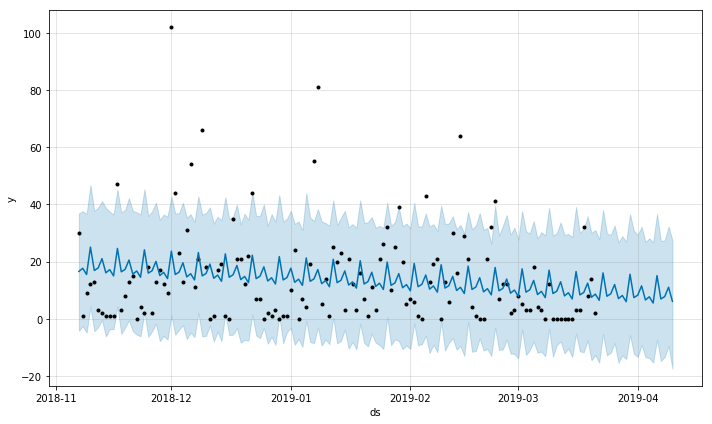

In [7]:
# Python
fig1 = m.plot(forecast)

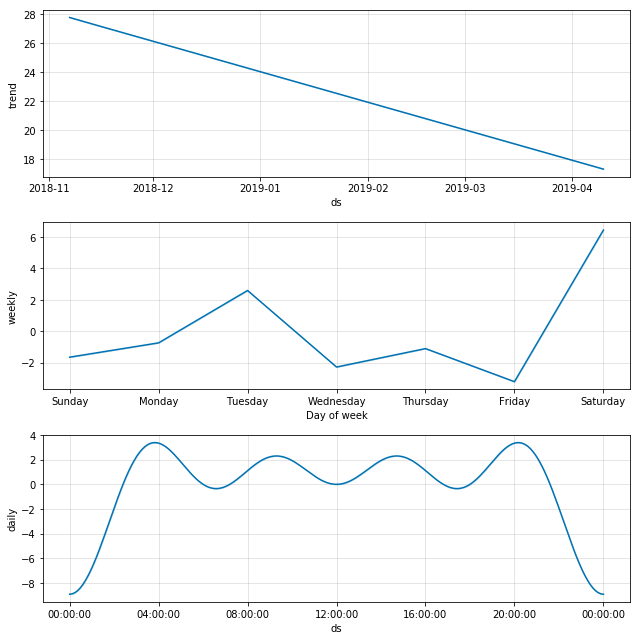

In [8]:
# Python
fig2 = m.plot_components(forecast)